# PRE-PROCESSING + PIPELINE (partie 2)

URL : https://youtu.be/OGWwzm304Xs?si=FLwjFSsIVLNRKeiJ

In [3]:
#importatons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Binarizer, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,LabelBinarizer,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

On a vu dans la 1ère partie les transformers de normalisation présents dans Sklearn. Il en existe quelques autres, notamment un transformer appelé **Normalizer** mais celui-ci **a la particularité de normaliser les lignes du dataset et non pas les colonnes**. C'est une opération qui peut être utile si on fait du NLP (Natural Language Processing).

## Création de polynômes

### PolynomialFeatures

A présent on va rapidement passer en revue les autres transformer qu'on trouve dans le module preprocessing tout d'abord nous avons PolynomialFeatures qui est très utile pour créer des variables polynomiales à partir de nos variables existantes, c'est ce qu'on appelle faire du Feature Engineering, et ça permet de développer des modèles de ML plus riches et plus sophistiqués.

Par exemple: si nous désirons développer un modèle polynomiale de degé 2 à partir d'une seule variable X, le transformer PolynomialFeatures() va alors créer une colonne de biais égale à 1(= x^0) une colonne x(= x^1) et une colonne x²(= x^2). Ce qui permettra à la machine de trouver les paramètres a, b et c d'un modèle polynomial f(x)= ax²+ bx+ c. on peut ainsi développer des modèles bien plus sophistiqués.

**Exemple:**

In [8]:
#définir X
X = np.array([[1],
             [2],
             [0.5]])
#créer un modèle polynomial de degré 3 à partir de la variable X
#la méthode fit_transform() combine la méthode fit() avec la méthode transform()
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

In [9]:
#[1., 1., 1., 1.] correspond à [1^0, 1^1, 1^2, 1^3]
#[1., 2., 4., 8.] correspond à [2^0, 2^1, 2^2, 2^3]
#[1., 0.5, 0.25, 0.125] correspond à [0.5^0, 0.5^1, 0.5^2, 0.5^3]

**Application:**

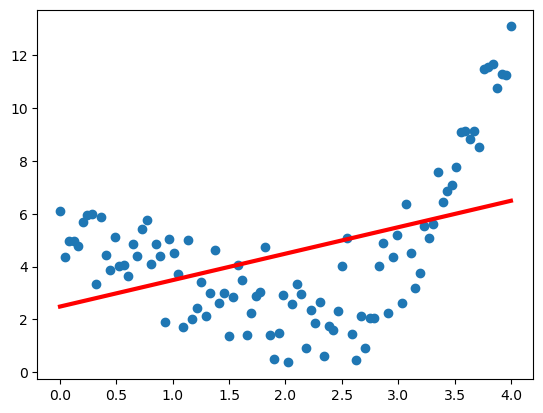

In [11]:
#créer un tableau numpy X de 100 valeurs uniformément réparties entre 0 et 4
#donner au tableau numpy de forme (100,) une forme (100, 1)
X = np.linspace(0, 4, 100).reshape((100, 1))

#y = X² + 5cos(X) et on y ajoute des valeurs aléatoires provenant d'une distribution normale 
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

#créer un nuage de points y en fonction de X
plt.scatter(X, y)

#entrainer le modèle de regression linéaire sur les données (X, y)
model = LinearRegression().fit(X, y)

#y_pred
y_pred = model.predict(X)

#créer la courbe y_pred en fonction de X
#de couleur rouge (c='r') et dépaisseur lw=3
plt.plot(X, y_pred, c='r', lw=3)

In [12]:
#dans l'exemple précédent, en développant un modèle de régression linéaire, le résultat n'est pas bon
#alors on crée une nouvelle variable polymiale X_poly à partir de X

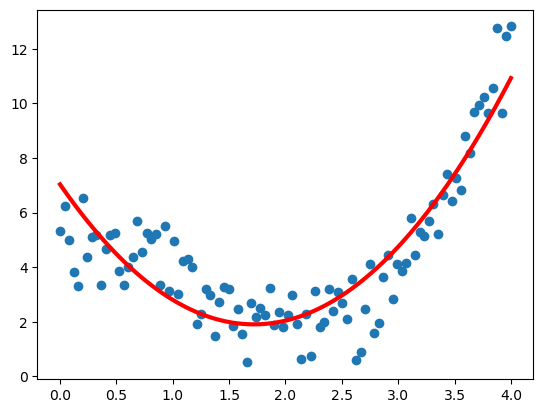

In [13]:
#créer un tableau numpy X de 100 points allant de 0 à 4 uniformément espacés
#donner au tableau numpy de forme (100,) une forme (100, 1)
X = np.linspace(0, 4, 100).reshape((100, 1))

#y = X² + 5cos(X) et on y ajoute des valeurs aléatoires provenant d'une distribution normale 
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

#créer un nuage de points y en fonction de X
plt.scatter(X, y)

#créer un modèle polynomial de degré 3 à partir de la variable X
#la méthode fit_transform() combine la méthode fit() avec la méthode transform()
X_poly = PolynomialFeatures(2).fit_transform(X)

#entraîner le modèle de regression linéaire sur les données (X_poly, y)
model = LinearRegression().fit(X_poly, y)

#y_pred
y_pred = model.predict(X_poly)

#créer la courbe y_pred en fonction de X
#de couleur c='r' et d'épaisseur lw=3
plt.plot(X, y_pred, c='r', lw=3)

In [14]:
#le modèle est bon!

## Transformation non linéaire

### PowerTransform

Permet de traiter les données pour leur accorder une distribution plus normale (ou gaussienne), ce qui facilite l'apprentissage d'un certain nombre de modèles de ML.

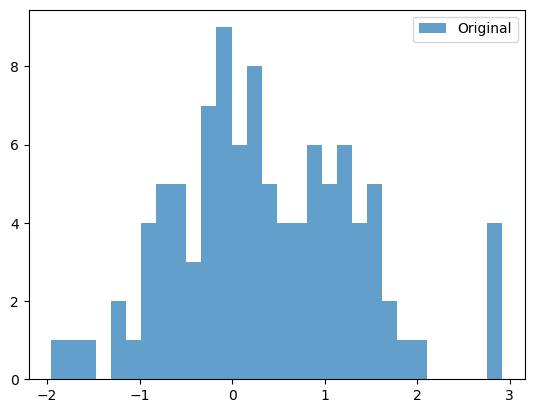

In [18]:
#np.random.seed(0) fixe la graine du générateur de nombres aléatoires
np.random.seed(0)

#np.random.rand(100, 2) génère un tableau (100, 2) de valeurs aléatoires suivant une distribution normale
#np.random.randn(100, 2) génère un tableau (100, 2) de valeurs aléatoires suivant une distribution normale standard (Moyenne = 0, Écart-type = 1)
X = np.random.rand(100, 2) + np.random.randn(100, 2)

#tracer un histogramme
#X[:, 0] représente toues les lignes de la 1ère colonne de X
#avec des intervalles bins=30, un niveau d'opacité alpha=0.7, et titre label= 'Original'
plt.hist(X[:, 0], bins=30, alpha=0.7, label= 'Original')
plt.legend()    #ajouter une légende

In [19]:
#on voit que les données X[:, 0] n'ont pas une distribution normale

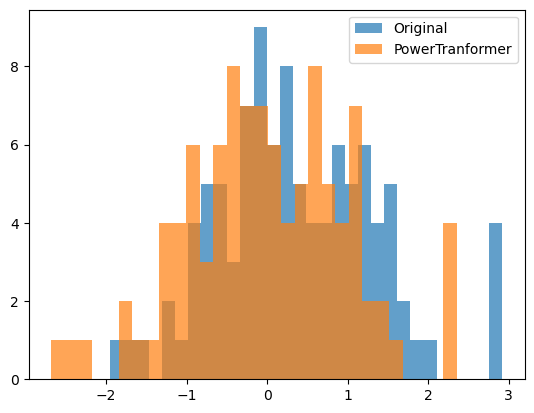

In [20]:
#np.random.seed(0) fixe la graine du générateur de nombres aléatoires
np.random.seed(0)

#np.random.rand(100, 2) génère un tableau (100, 2) de valeurs aléatoires suivant une distribution normale
#np.random.randn(100, 2) génère un tableau (100, 2) de valeurs aléatoires suivant une distribution normale standard (Moyenne = 0, Écart-type = 1)
X = np.random.rand(100, 2) + np.random.randn(100, 2)

#créer X2 à partir de la variable X en utilisant PowerTransformer()
#la méthode fit_transform() combine la méthode fit() avec la méthode transform()
X2 = PowerTransformer().fit_transform(X)

#tracer un histogramme
#X[:, 0] représente toues les lignes de la 1ère colonne de X
#avec des intervalles bins=30, un niveau d'opacité alpha=0.7, et titre label= 'Original'
plt.hist(X[:, 0], bins=30, alpha=0.7, label= 'Original')

#X2[:, 0] représente toues les lignes de la 1ère colonne de X2
#avec des intervalles bins=30, un niveau d'opacité alpha=0.7, et titre label= 'Original'
plt.hist(X2[:, 0], bins=30, alpha=0.7, label= 'PowerTranformer')

plt.legend()    #ajouter une légende

In [21]:
#on voit la différence entre les 2 histogrammes (avant et aprèes la transformation des données)
#PowerTransformer donne aux données X[:, 0] une distribution normale pour faciliter l'apprentissage du modèle

## Discrétisation

Il y a aussi des transformers qui permettent de faire des opérations de discrétisation, c'est-à-dire découper une variable continue en plusieurs parties, cette opération peut être très utile pour créer automatiquement des catégories dans une variable (comme par exemple différentes catégories d'âge dans une variable qui comprend différents âges).

Pour ça il existe deux transformers:

### Binarizer

Il permet de diviser une variable en deux catégories selon un seuil qu'on définit dans le transformer. Binarizer est une classe qui transforme des données numériques en valeurs binaires (0 ou 1).

In [26]:
#créer un tableau numpy X de 10 valeurs uniformément réparties entre 0 et 5
#donner au tableau numpy de forme (10,) une forme (10, 1)
X = np.linspace(0, 5, 10).reshape((10, 1))

#afficher X
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [27]:
#np.hstack() permet de concaténer des tableaux le long de l'axe horizontal
#threshold=3 définit le seuil
#ici, toute valeur dans X qui est inférieure ou égale à 3 sera transformée en 0
#et toute valeur supérieure à 3 sera transformée en 1
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

### KBinsDiscretizer

Il permet de découper une variable plus que 2 catégories.

## Personnalisation (transformer personnalisé)

### FunctionTransformer

In [32]:
#créer un tableau numpy X de 10 valeurs uniformément réparties entre 1 et 5
#reshape((-1, 1)) transforme le tableau en une colonne
#formant ainsi une matrice avec une seule colonne et 10 lignes
X = np.linspace(1, 5, 10).reshape((-1, 1))

#afficher X
X

array([[1.        ],
       [1.44444444],
       [1.88888889],
       [2.33333333],
       [2.77777778],
       [3.22222222],
       [3.66666667],
       [4.11111111],
       [4.55555556],
       [5.        ]])

In [33]:
#la forme de X
X.shape

(10, 1)

In [34]:
#initialiser un transformateur fonctionnel qui applique une transformation logarithmique  
#avec une transformation inverse pour retrouver les valeurs d'origine
Mon_Transformer = FunctionTransformer(func=np.log1p,  # fonction pour calculer log(1 + x)  
                                         inverse_func=np.expm1)  # fonction inverse pour exp(x) - 1  

#appliquer la transformation à X et ajuster le transformateur sur ces données X
Mon_Transformer.fit_transform(X)

array([[0.69314718],
       [0.89381788],
       [1.06087196],
       [1.2039728 ],
       [1.32913595],
       [1.44036158],
       [1.54044504],
       [1.63141682],
       [1.71479843],
       [1.79175947]])

**Remarque:**

si vous débutez en ML il est conseillé de retenir **LabelEncoder et OneHotEncoder pour les opérations d'encodage, MinMaxScaler et StandardScaler pour les opérations de normalisation** et aussi **PolynomialFeatures** parce qu'il peut servir après.

Il est temps de voir comment combiner les transformers avec des estimators pour créer des modèles de ML vraiment performants, pour ça on va utiliser une des classes les plus importantes de tout sklearn, c'est la classe pipeline.

## Pipeline

Comme on l'a vu au début, lorsqu'on développe un modèle de ML, on utilise en premier lieu les données du train set pour développer un ou plusieurs transformers, ce qui permet de traiter ces données pour ensuite entraîner un estimator. Une fois cette étape terminée, on utilise les transformers tels qu'ils ont été développés pour traiter les données du test set, des données que l'on peut ensuite fournir à l'estimator pour qu'il effectue ses prédictions.

**Exemple:**

In [39]:
#charger le jeu de données des fleurs d'Iris
iris = load_iris()

#définir X
X = iris.data

#définir y
y = iris.target

#diviser le dataset en 2 parties: train set et test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
#créer un transformer
scaler = StandardScaler()

#créer X_train_transformed à partir de X_train en utilisant StandardScaler()
#la méthode fit_transform() combine la méthode fit() avec la méthode transform()
X_train_transformed = scaler.fit_transform(X_train)

#estimator
model = SGDClassifier(random_state=0)

#la méthode fit() permet de développer une fonction de transformation en analysant les données X_train_transformed et y_train
model.fit(X_train_transformed, y_train)

#test
#la méthode transform() permet d'appliquer la fonction de transformation sur les données X_test
X_test_transformed = scaler.transform(X_test)

#faire de nouvelles prédictions avec predict() sur les données X_test_transformed
model.predict(X_test_transformed)

array([2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [41]:
'''
Explication:
on commence par diviser le dataset en deux parties: un train set et un test set
puis on crée un transformer, par exemple StandardScaler qui sert à traiter les données X_train
on développe alors un estimator, par exemple un estimator de la classe SGDClassifier
que l'on va développer avec la méthode fit en utilisant les données X_test_transformed (X_test transformé) et y_train
si on désire utiliser le modèle pour faire des prédictions sur le test set,
on va commencer par transformer les données du test set (X_test) à l'aide du StandardScaler en utilisant la méthode transform()
puis on va injecter ces données qui ont été transformées (X_test_transformed) dans la méthode predict du modèle
'''

"\nExplication:\non commence par diviser le dataset en deux parties: un train set et un test set\npuis on crée un transformer, par exemple StandardScaler qui sert à traiter les données X_train\non développe alors un estimator, par exemple un estimator de la classe SGDClassifier\nque l'on va développer avec la méthode fit en utilisant les données X_test_transformed (X_test transformé) et y_train\nsi on désire utiliser le modèle pour faire des prédictions sur le test set,\non va commencer par transformer les données du test set (X_test) à l'aide du StandardScaler en utilisant la méthode transform()\npuis on va injecter ces données qui ont été transformées (X_test_transformed) dans la méthode predict du modèle\n"

**Les pipelines et le composite estimator:**

Il existe une façon beaucoup plus simple et efficace d'écrire ce code, l'astuce c'est de regrouper le transformer et l'estimateur dans une pipeline (une chaîne de transformation), on obtient ainsi un composite estimator c'est-à-dire un estimator composé de plusieurs éléments.

Cet estimator dispose comme tous les autres d'une méthode fit, d'une méthode predict et d'une méthode score. Lorsqu'on utilise la méthode fit, tous les composants de cet estimator vont utiliser leur méthode fit, ainsi on développe les transformers et l'estimator d'un seul coup, sur une seule ligne de code.

De la même manière, quand on utilise la méthode predict de ce composite estimator, alors tous les transformers vont transformer les données et l'estimator qui se trouve en bout de chaîne va effectuer une prédiction.

**Pour créer une pipeline, on a 2 options:**
- **Classe** pipeline
- **Fonction** make_pipeline()

**model = make_pipeline(StandardScaler(), SGDClassifier())**

- **model.fit(X_train, y_train)**
- **model.score(X_test, y_test)**
- **model.predict(X_test)**

On refait le même exemple de tout à l'heure de l'utilisation de StandardScaler() et SGDClassifier(), mais cette fois en utilisant une pipeline:

In [43]:
#créer un pipeline avec StandardScaler() et SGDClassifier()
model = make_pipeline(StandardScaler(),
                      SGDClassifier())

#entrainer le modèle avec la méthode fit() sur les données X_train et y_train
model.fit(X_train, y_train)

#effectuer une prédiction
model.predict(X_test)

array([2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [44]:
#on obtient les mêmes résultats que tout à l'heure!

Le fait d'utiliser **une pipeline** pour regrouper les transformers dans un seul objet **présente plusieurs avantages:**
1. C'est plus simple à lire c'est plus simple à utiliser
2. C'est plus sécurisé
3. Permet d'effectuer des cross-validation, sur l'ensemble de la chaîne de transformation. Et qui dit cross-validation dit GridSearchCv, et c'est là que les pipelines sont géniales: on peut optimiser toute une chaîne de transformation avec GridSearchCv, et tout ce qu'on a à faire c'est de définir la pipeline, de définir le nombre de splits (plis) pour la cross-validation et de définir un dictionnaire paramètres dans lequel on va identifier chaque paramètre de la chaîne de transformation à optimiser.

### Pipeline et GridSearchCv

- On peut utiliser GridSearchCv pour trouver les meilleurs paramètres de la pipeline:

**grid = (pipeline, params, cv)**

**params = {< composant >_ _ < paramètre >: [......]}**

**grid.fit(X_train, y_train)**

**grid.best_estimator**

- Démonstration:

In [48]:
#créer un pipeline avec PolynomialFeatures(), StandardScaler() et SGDClassifier()
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                     SGDClassifier(random_state=0))

#afficher la pipeline
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [49]:
#créer un dictionnairequi contient les différents paramètres à régler
#tester différents degrés de polynômes pour la transformation des caractéristiques (degré 2, 3 et 4)
#tester le type de régularisation à utiliser dans le classificateur : l1 (régularisation Lasso) ou l2 (régularisation Ridge)
params = {
    'polynomialfeatures__degree': [2, 3, 4],
    'sgdclassifier__penalty': ['l1', 'l2']
}

#initialiser GridSearchCV
#cv=4 signifie une cross validation à 4 splits (plis)
grid = GridSearchCV(model, param_grid=params, cv=4)

#entraîner le modèle
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [50]:
#les meilleurs paramètres
grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(penalty='l1', random_state=0))])

In [51]:
#les meilleurs paramètres sont: 4 degrés avec penalty='l1'

In [52]:
grid.score(X_test, y_test)

0.9473684210526315

In [53]:
#on obtient une performance de 94%

**Explication du code:**

Le code utilise la bibliothèque scikit-learn en Python pour créer et optimiser un modèle de machine learning, en particulier un classificateur basé sur la descente de gradient stochastique (SGDClassifier). Voici une explication détaillée de chaque partie du code :

**1. Création de la pipeline:**

model = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state=0))

- **make_pipeline:** Cette fonction permet de chaîner plusieurs étapes de transformation et un modèle en un seul objet. Cela rend le code plus propre et facile à gérer.
- **PolynomialFeatures():** Cette transformation génère des caractéristiques polynomiales à partir des données d'entrée. Par exemple, pour un degré d, elle créera des caractéristiques comme x², xy, y², etc. Cela permet de modéliser des relations non linéaires.
- **StandardScaler():** Ce transformateur met les données à l'échelle (standardisation). Il centre les données (en soustrayant la moyenne) et les met à l'échelle (en divisant par l'écart type) pour avoir une distribution de moyenne 0 et d’écart type 1. Cela est important pour de nombreux algorithmes de machine learning qui sont sensibles à l'échelle des données.
- **SGDClassifier(random_state=0):** C'est le classificateur qui utilise la descente de gradient stochastique. Le paramètre random_state permet de garantir la reproductibilité des résultats.

**2. Afficher la pipeline:**

model

Cette ligne affiche la structure du pipeline que l'on vient de créer, montrant les différentes étapes de la transformation et le classificateur.

**3. Création du dictionnaire des paramètres**

params = {'polynomialfeatures__degree': [2, 3, 4], 'sgdclassifier__penalty': ['l1', 'l2']}

- **params:** Ce dictionnaire contient les paramètres que l'on souhaite ajuster lors de la recherche d'hyperparamètres.
- **'polynomialfeatures__degree':** Cela permet de tester différents degrés de polynômes pour la transformation des caractéristiques (degré 2, 3 et 4).
- **'sgdclassifier__penalty':** Cela définit le type de régularisation à utiliser dans le classificateur : l1 (régularisation Lasso) ou l2 (régularisation Ridge).

**4. Initialisation de GridSearchCV:**

grid = GridSearchCV(model, param_grid=params, cv=4)

- **GridSearchCV:** Il s'agit d'un outil qui permet de faire une recherche exhaustive sur une grille de paramètres spécifiés.
- **model:** Le modèle qu'on souhaite optimiser.
- **param_grid=params:** Le dictionnaire de paramètres que l'on veut explorer.
- **cv=4:** Cela signifie que la validation croisée sera effectuée avec 4 plis, c’est-à-dire que les données seront divisées en 4 ensembles pour entraîner le modèle et évaluer sa performance.

**5. Entraînement du modèle**

grid.fit(X_train, y_train)

- **fit:** Cette méthode entraîne le modèle sur les données d'entraînement (X_train, y_train) tout en testant toutes les combinaisons de paramètres spécifiées dans params. Elle effectue également la validation croisée en interne pour évaluer la performance de chaque combinaison.

**6. Affichage des meilleurs paramètres**

- **best_estimator_:** Cette propriété permet d’accéder au modèle qui a donné les meilleurs résultats sur les données d’entraînement, en fonction des paramètres optimisés. Il représente donc la combinaison de transformations et de classificateurs qui a obtenu les meilleures performances.

**7. Évaluation de la performance**

grid.score(X_test, y_test)

- **X_test:** Ce sont les caractéristiques (features) de l'ensemble de test sur lequel on souhaite évaluer le modèle.
- **y_test:** Ce sont les étiquettes (ou cibles) correspondantes pour l'ensemble de test, ces valeurs représentent ce que le modèle doit prédire.
- **score()** cette méthode va comparer les prédictions faites par le modèle avec les vraies étiquettes dans y_test et calculer un score basé sur cela.